# Handwritten Classification MNIST

**Import necessary packages**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [2]:
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential

import matplotlib.pyplot as plt

**Load dataset**

In [3]:
mnist = keras.datasets.mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


**Exploratory Data Analysis**

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

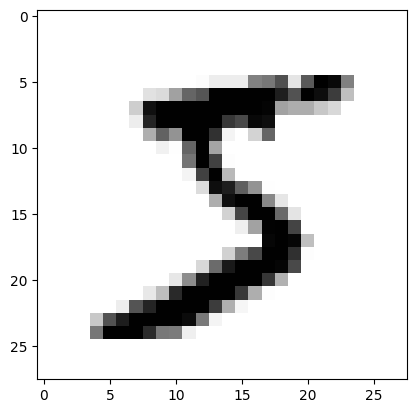

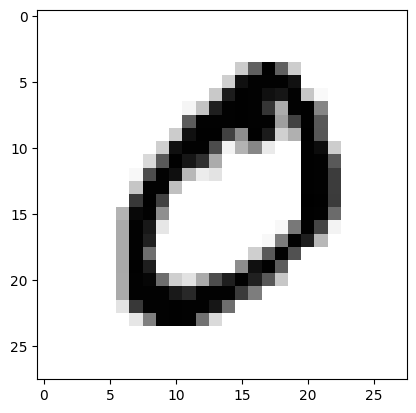

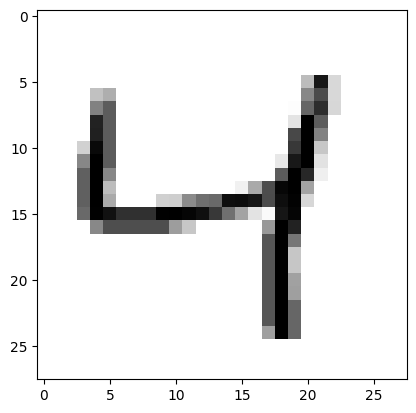

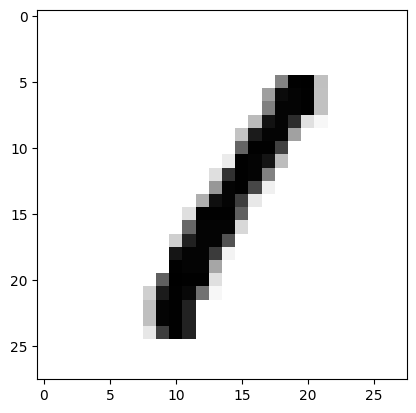

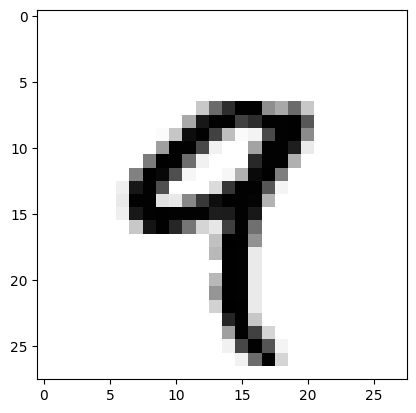

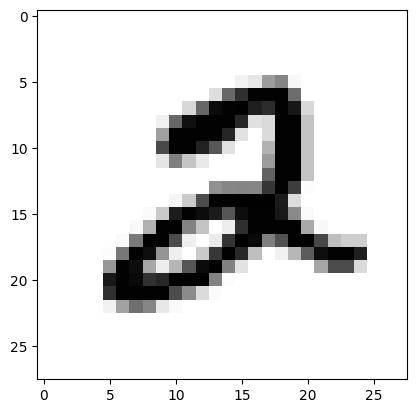

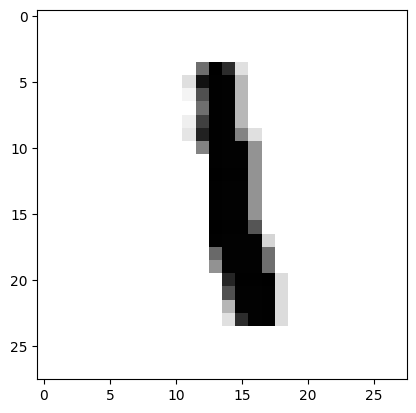

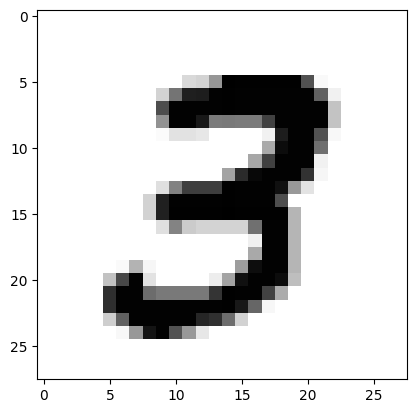

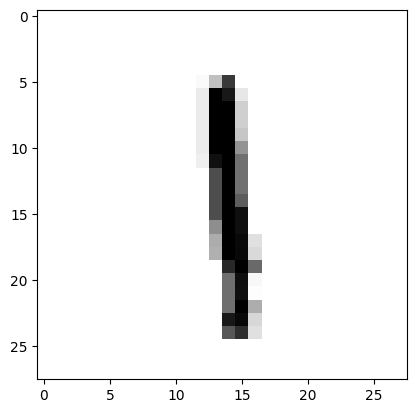

In [7]:
#plotting the first 9 train images
from matplotlib import pyplot
for i in range(9):
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
#     plt.title(np.argmax(pred[i], axis=0))
    plt.show()

In [8]:
#Check the minimun and maximum values of X_train and X_test
import numpy as np
print("minimum value of train dataset: ", np.min(X_train))
print("maximum value of train dataset: ", np.max(X_train))

minimum value of train dataset:  0
maximum value of train dataset:  255


In [9]:
print("minimum value of test dataset: ", np.min(X_test))
print("maximum value of test dataset: ", np.max(X_test))

minimum value of test dataset:  0
maximum value of test dataset:  255


**Data Preprocessing**

In [10]:
#Change the values of X_train and X_test between 0 and 1
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
#Check the minimun and maximum values of X_train and X_test
import numpy as np
print("minimum value of train dataset: ", np.min(X_train))
print("maximum value of train dataset: ", np.max(X_train))
print("minimum value of test dataset: ", np.min(X_test))
print("maximum value of test dataset: ", np.max(X_test))

minimum value of train dataset:  0.0
maximum value of train dataset:  1.0
minimum value of test dataset:  0.0
maximum value of test dataset:  1.0


**Build and train CNN Model**

In [12]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax")) 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=100)
model.save('cnn_handwritten_recog.h5')
print("Model saved!")

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2626 - accuracy: 0.9251
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1142 - accuracy: 0.9669
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0776 - accuracy: 0.9766
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0576 - accuracy: 0.9824
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9861
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0347 - accuracy: 0.9894
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0271 - accuracy: 0.9917
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0218 - accuracy: 0.9932
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0187 - accuracy: 0.9943
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0021 - accuracy: 0.9993
Epoch 80/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0014 - accuracy: 0.9994
Epoch 81/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 82/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0015 - accuracy: 0.9995
Epoch 83/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 84/100
1875/1875 [==============================] - 5s 3ms/step - loss: 4.1260e-04 - accuracy: 0.9999
Epoch 85/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 86/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0013 - accuracy: 0.9995
Epoch 87/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 88/100
1875/1875 [==============================] - 5s 3ms/step - l

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2380 - accuracy: 0.9787


In [17]:
print("Test loss is: ", test_loss)

Test loss is:  0.23796841502189636


In [18]:
print("Test accuracy is: ", test_acc)

Test accuracy is:  0.9786999821662903


**Model prediction using X_test dataset**

313/313 [==============================] - 1s 4ms/step


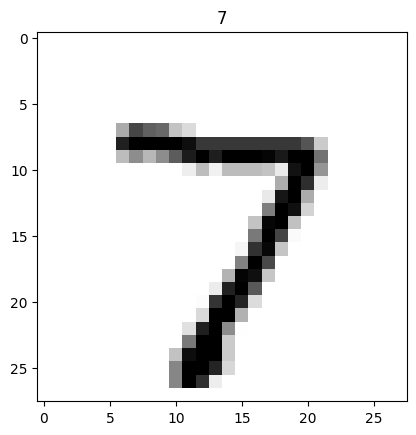

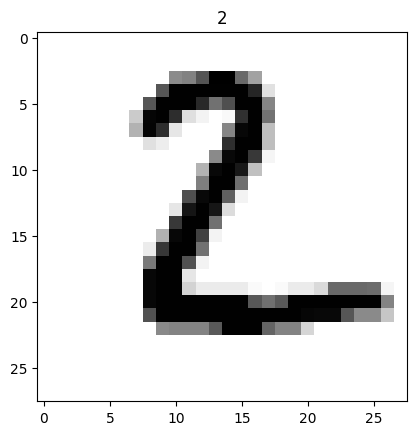

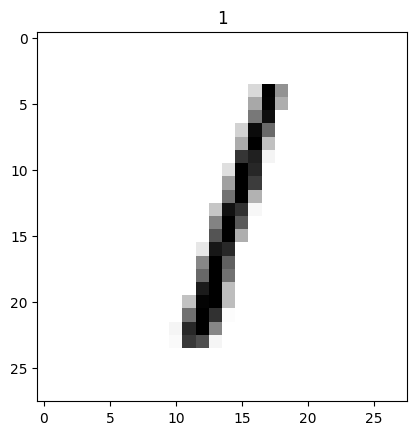

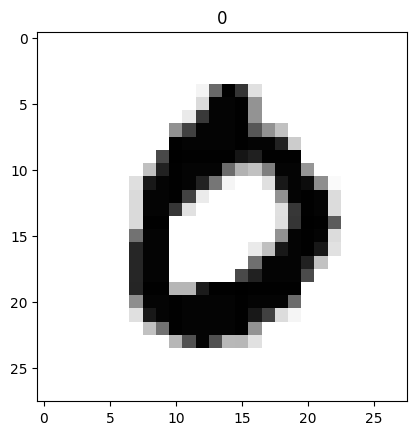

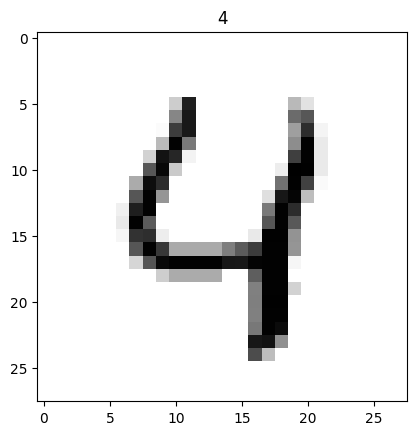

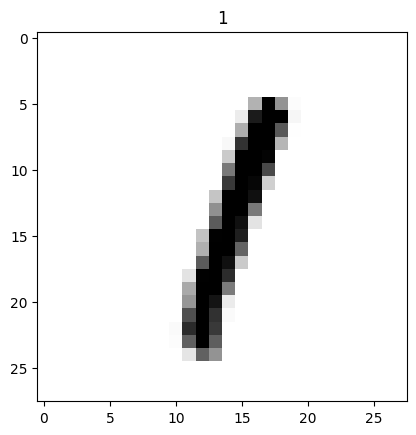

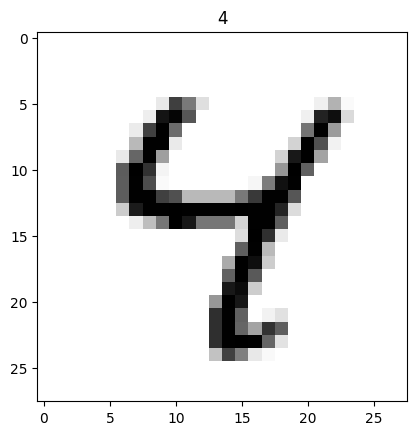

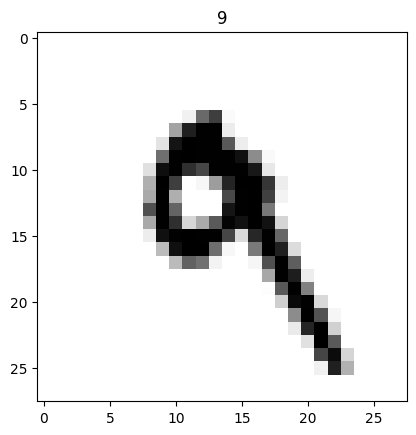

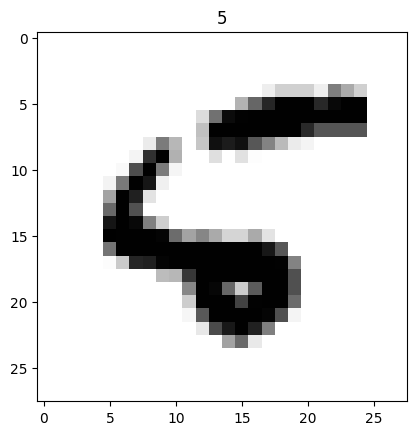

In [19]:
pred = model.predict(X_test)

for i in range(9):
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(np.argmax(pred[i], axis=0))
    plt.show()